In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
S = np.loadtxt('SN_m_tot_V2.0.txt', usecols = (2,3))
print(S)

[[1749.042   96.7  ]
 [1749.123  104.3  ]
 [1749.204  116.7  ]
 ...
 [2023.958  114.2  ]
 [2024.042  123.   ]
 [2024.124  124.7  ]]


Text(0, 0.5, 'Monthly Sunspot Number')

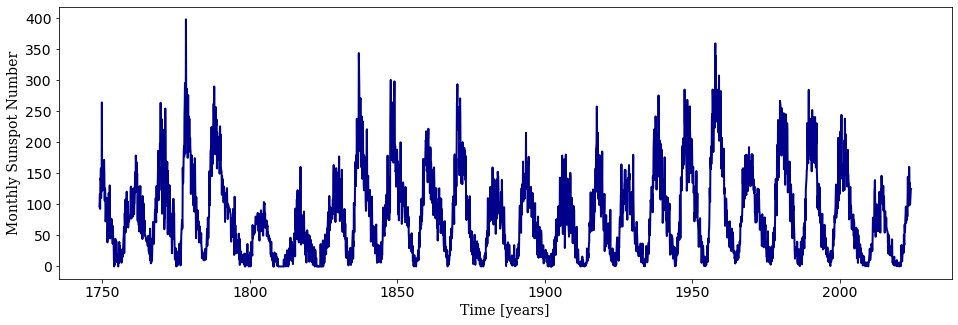

In [9]:
fig = plt.figure(figsize = (16,5))
plt.rcParams.update({'font.size': 14})
plt.plot(S[:,0],S[:,1],color='darkblue',linewidth=2,markersize=10)
plt.xlabel("Time [years]",family='serif',style='normal')
plt.ylabel("Monthly Sunspot Number",family='serif',style='normal')

In [11]:
from scipy.ndimage import gaussian_filter1d


In [12]:
# Apply Gaussian smoothing
sigma = 2.67  # Standard deviation of the Gaussian kernel
smoothed_data = gaussian_filter1d(S[:,1], sigma)
print(smoothed_data)

[108.15587776 110.19462225 113.96715075 ... 118.28901326 118.20567243
 118.39780488]


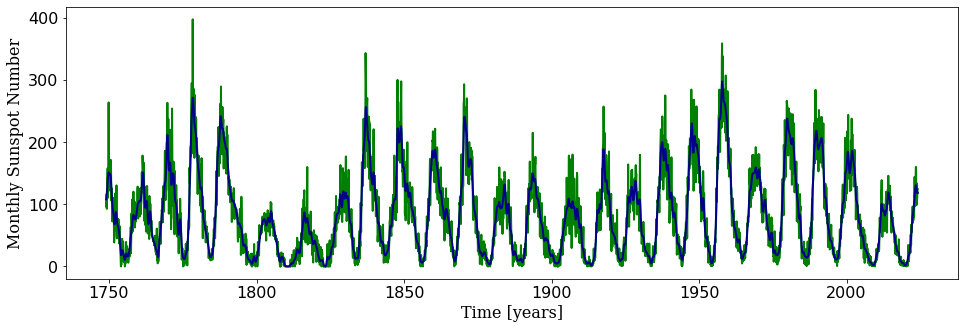

In [14]:
fig = plt.figure(figsize = (16,5))
plt.rcParams.update({'font.size': 16})

plt.plot(S[:,0],S[:,1],color='green',linewidth=2,markersize=10)
plt.plot(S[:,0],smoothed_data,color='darkblue',linewidth=2,markersize=10)

plt.xlabel("Time [years]",family='serif',style='normal')
plt.ylabel("Monthly Sunspot Number",family='serif',style='normal')

np.savetxt('smooth.txt',np.vstack((S[:,0],smoothed_data)).T,fmt='%10.3f   %10.3f')

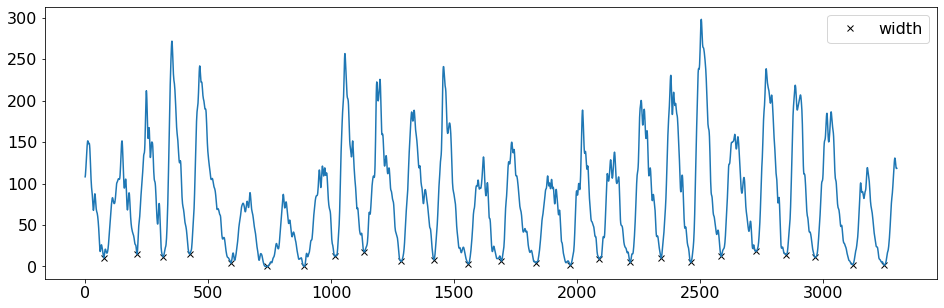

In [13]:
from scipy.signal import find_peaks,argrelextrema,argrelmin

fig = plt.figure(figsize = (16,5))
plt.rcParams.update({'font.size': 16})

x=abs(smoothed_data)

peaks3 = argrelmin(x, axis = 0, order=25)
plt.plot(peaks3[0], x[peaks3], "xk"); plt.plot(x); plt.legend(['width'])
plt.show()

np.savetxt('min_SSN.txt',np.vstack((S[:,0][peaks3],x[peaks3])).T,fmt='%10.3f   %10.3f')

In [14]:
Y = np.loadtxt('min_SSN.txt').T
#print(Y[0])
sn = np.loadtxt('smooth.txt').T
print(Y[0],sn[0])
print()
print(np.shape(sn))
print((Y))
print()
print(sn)

[1755.371 1766.623 1775.538 1784.456 1798.455 1810.538 1823.204 1833.623
 1843.707 1856.124 1867.204 1878.958 1890.123 1901.79  1913.455 1923.288
 1933.79  1944.29  1954.288 1964.624 1976.54  1986.538 1996.373 2009.123
 2019.79 ] [1749.042 1749.123 1749.204 ... 2023.958 2024.042 2024.124]

(2, 3302)
[[1.755371e+03 1.766623e+03 1.775538e+03 1.784456e+03 1.798455e+03
  1.810538e+03 1.823204e+03 1.833623e+03 1.843707e+03 1.856124e+03
  1.867204e+03 1.878958e+03 1.890123e+03 1.901790e+03 1.913455e+03
  1.923288e+03 1.933790e+03 1.944290e+03 1.954288e+03 1.964624e+03
  1.976540e+03 1.986538e+03 1.996373e+03 2.009123e+03 2.019790e+03]
 [1.061000e+01 1.481900e+01 1.182600e+01 1.490500e+01 4.200000e+00
  0.000000e+00 2.710000e-01 1.245200e+01 1.770600e+01 6.205000e+00
  8.186000e+00 3.314000e+00 6.706000e+00 4.503000e+00 1.737000e+00
  8.954000e+00 4.988000e+00 1.011900e+01 5.025000e+00 1.211500e+01
  1.852300e+01 1.416400e+01 1.124900e+01 2.203000e+00 1.673000e+00]]

[[1749.042 1749.123 1749.

In [18]:
R1=[]
R2=[]
R3=[]
for i in range(0,25):
    for j in range(0,3297):
        # Calculation for rising rate of polar field from minimum using the "Polar precursor method"
        if Y[0, i] == sn[0, j]:
            r_1 = (np.abs(sn[1, j + 20]) - np.abs(sn[1, j + 12])) / (sn[0, j + 20] - sn[0, j + 12])
            r_2 = (np.abs(sn[1, j + 22]) - np.abs(sn[1, j + 6])) / (sn[0, j + 22] - sn[0, j + 6])
            r_3 = (np.abs(sn[1, j + 27]) - np.abs(sn[1, j + 12])) / (sn[0, j + 27] - sn[0, j + 12])

    R1.append(r_1)
    R2.append(r_2)
    R3.append(r_3)
np.savetxt('rise_rate.txt',np.vstack((R1,R2,R3)).T,fmt='%10.3f   %10.3f %10.3f')


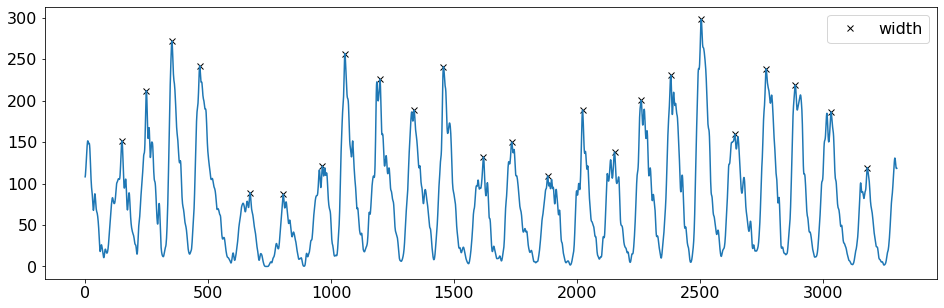

[151.468 212.005 271.843 241.99   89.049  86.951 121.066 256.774 225.729
 188.428 241.156 132.097 149.941 109.227 188.638 137.881 200.294 230.627
 298.145 159.389 238.517 218.647 186.554 119.184]


In [19]:
## Amplitude calculation form ssn    
#(here we find peaks using findpeaks function)

fig = plt.figure(figsize = (16,5))
plt.rcParams.update({'font.size': 16})


y=sn[1]
peaks3,m=find_peaks(y, width=20)
plt.plot(peaks3, y[peaks3], "xk"); plt.plot(y); plt.legend(['width'])
plt.show()
amplitude = y[peaks3]
print(amplitude)

In [20]:
## Correlation of rise rate with next cycle amplitude
from scipy.stats import pearsonr
from numpy import cov
corr1, _ = pearsonr(R1[0:24], amplitude)
corr2, _ = pearsonr(R2[0:24], amplitude)
corr3, _ = pearsonr(R3[0:24], amplitude)

print, corr1, corr2, corr3

Rise_rate = (np.array(R1) + np.array(R2) + np.array(R3)) / 3.0
Rise_rate

corr4, _ = pearsonr(Rise_rate[0:24], amplitude)
corr4

0.8969620316508085

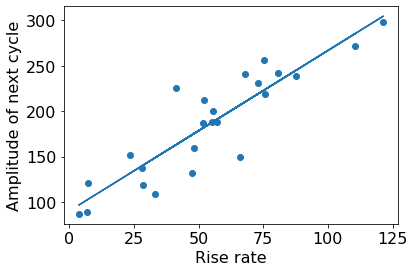

y= 1.767567673630718 x + 90.04594927779047


In [23]:
### for sunspot no.
import scipy.stats as stats

slope, intercept, r, p, std_err = stats.linregress(Rise_rate[0:24], amplitude)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, Rise_rate[0:24]))

plt.scatter(Rise_rate[0:24], amplitude)
plt.plot(Rise_rate[0:24], mymodel)
plt.xlabel('Rise rate')
plt.ylabel('Amplitude of next cycle')
#plt.savefig('regression_wso.eps')
plt.show()
print('y=',slope,'x +',intercept)

In [27]:
x = Rise_rate[24]
y = 1.767567673630718 * x + 90.04594927779047 # This predicts the 25th peak in number of sunpots
print(y)

138.0830915248273
